In [1]:
import os
os.chdir(r'C:\Users\Navid\Documents\ds_salary_proj')

In [2]:
#!conda install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('df_salary')

In [4]:
df = df.reset_index(drop=True)

## Cleaning the salary data

In [5]:
# df['salary_type'] = df['Salary Range'].apply(lambda x: x.split()[1] if 'Employer Provided Salary' not in x
#                                              else x.split()[1] + " "+ x.split()[2] if 'Per Hour' in x
#                                              else x.split('\n')[0])

In [6]:
import re
df['salary'] = df['Salary Range'].str.extract('(\$\d{2,3}k?-\$\d{2,3}k?)') 
df['per_hour'] = df['Salary Range'].apply(lambda x: 1 if 'Per' in x or 'per' in x else 0)

In [7]:
df.salary.dropna(axis = 0, inplace = True)

In [8]:
# # df['Salary Range'] = df['Salary Range'].apply(lambda x: x.split("\n")[0] if 'Employer Provided Salary' not in x 
#                                               else x.split('\n')[1])

In [9]:
# df['Salary Range'] = df['Salary Range'].apply(lambda x: x.split()[0] if 'per hour' in x.lower() 
#                                               else x)

In [10]:
# print(df['salary_type'].unique())

In [11]:
# df['per_hour'] = [1 if 'Per' in x else 0 for x in df['salary_type']]
# df['Employer_reported'] = df['salary_type'].apply(lambda x: 1 if 'employer' in x.lower() else 0)

In [12]:
#extracting avg salary from slaray estimation
df['avg_salary'] = (df['salary'].map(lambda x: x.split('-')[0].lstrip('$').rstrip('k')).astype('int32')
                    +df['salary'].map(lambda x: x.split('-')[1].lstrip('$').rstrip('k')).astype('int32'))/2

In [13]:
#now lets find the avg salary of those reported per hour
#we multiply them by 2000 (approximately the number of hourse per year) and devide by 1000 (therefore, we just multiply it by 2)
df['avg_salary'] = df.apply(lambda x: x.avg_salary if x.per_hour != 1 else x.avg_salary*2,axis=1)

In [14]:
df.drop(['Salary Range', 'salary', 'Unnamed: 0', 'Headquarters'], axis=1, inplace =True)

In [15]:
df = df[df.duplicated().values != True]

In [16]:
df.head()

,index,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,per_hour,avg_salary
0,0,Data Analyst,Job Snapshot\r\nLocation:\r\n\r\n7500 East Col...,3.7,Shoe Carnival Inc.\r\n3.7,"Evansville, IN",5001 to 10000 Employees,1978,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$1 to $2 billion (USD),-1.0,0,51.5
1,1,Data Analyst,Data Analyst\r\n\r\nClassification:\r\n\r\nExe...,4.6,Fusion Medical Staffing\r\n4.6,"Omaha, NE",201 to 500 Employees,2009,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1.0,0,52.0
2,2,Business Data Analyst (Mortgage Operations),"First Midwest, with assets over $20 billion, i...",3.5,First Midwest Bank\r\n3.5,"Gurnee, IL",1001 to 5000 Employees,1940,Company - Public,Banks & Credit Unions,Finance,$500 million to $1 billion (USD),-1.0,0,61.5
3,3,Web Data Analyst,Web Data Analyst\r\nCorporate Headquarters\r\n...,3.5,Uline\r\n3.5,"Milwaukee, WI",5001 to 10000 Employees,1980,Company - Private,Wholesale,Business Services,Unknown / Non-Applicable,-1.0,0,72.0
4,4,Clinical Data Analyst (RN) - MCS Research & De...,Data Analyst - MCS Research & Development - IN...,2.8,Integris Health\r\n2.8,"Midwest City, OK",5001 to 10000 Employees,1983,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Less than $1 million (USD),-1.0,0,47.5


## Lets extract the name of the companies

In [17]:
df.loc[df['Rating'] == -1, 'Company Name']
# it seems that the companies without rating, only have their name in the Company Name column

1636     CEC Vibration Products, LLC
2503            Edward Daniels Group
2887    PLI Card Marketing Solutions
3140         Intellitech Corporation
3405    PLI Card Marketing Solutions
3489     CEC Vibration Products, LLC
Name: Company Name, dtype: object

In [18]:
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] == -1 else x['Company Name'].split("\n")[0] , axis = 1)

In [19]:
#Adding a fature for FAANG companies
df['FAANG'] = df['Company Name'].apply(lambda x: 1 if x in ['Facebook','Amazon','Netflix','Apple','Google'] else 0)

## Extracting the states from the locations

In [20]:
# # Since in Location columns there are instacnes wuth differnt structre, such as 'Virgina', we need to replace them with 
# # the same structure as others so that we can extract usefull info from them

# # We remove the ones without specified location (United States)
df = df[df['Location'] != 'United States']
# list_1 = []
# for item in df.Location:
#     if ',' not in item:
#         list_1.append(item)

# set(list_1)

In [21]:
df['state'] = df.apply(lambda x: x['Location'] if ',' not in x['Location']
                       else x['Location'].split(',')[1].lstrip() , axis = 1)
# we create a dict to use for mapping
state_convertor = {'Colorado' : 'CO' , 'Georgia' : 'GA' , 'Missouri' : 'MO' , 'New Jersey' : 'NJ' ,
             'Remote' : 'Remote' , 'Utah' : 'UT' , 'Virginia' : 'VA' , 'California' : 'CA' , 'Pennsylvania' : 'PA' ,
                'Puerto Rico' : 'PR' , 'Texas' : 'TX' , 'Illinois' : 'IL' }
df['state'] = df['state'].apply(lambda x: state_convertor[x] if x in state_convertor else x)

In [22]:
# Now we want to change the founded year to age of the company
df['Founded'] = df['Founded'].apply(lambda x: -1 if x == -1 else 2020 - x)

In [23]:
#the length of the job description can be a usefull feature
df.dropna(axis=0, inplace=True)
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

## Job Titles Simplifier
## Extracting Seniority

In [24]:
df['Job Title'].value_counts()[:40]

Data Analyst                                                472
Data Scientist                                              285
Data Engineer                                                85
Senior Data Engineer                                         45
Senior Data Scientist                                        33
Machine Learning Engineer                                    23
Senior Data Analyst                                          22
Data Architect                                               18
Software Engineer                                            11
Sr. Data Scientist                                           10
Senior Software Engineer                                     10
Solutions Architect                                           9
Senior Business Intelligence Analyst                          8
Research Data Analyst                                         8
Lead Data Engineer                                            7
Lead Data Scientist                     

In [25]:
# job title convertor
def title_extractor(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower() or 'nlp' in title.lower():
        return 'data scientist'
    elif 'data analyst' in title.lower() or 'marketing data analyst' in title.lower() or 'business intelligence analyst' in title.lower() or 'quantitative analyst' in title.lower() or 'analytic' in title.lower() or 'analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower() or 'deep learning' in title.lower():
        return 'machine learning engineer'
    elif 'data architect' in title.lower():
        return 'data architect'
    else:
        return 'na'

In [26]:
# seniority extractor
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower() or 'ii' in title.lower():
        return '1'
    else:
        return '0'
    

In [27]:
df['seniority'] = df['Job Title'].apply(seniority)
df['title'] = df['Job Title'].apply(title_extractor)

In [28]:
df.seniority.value_counts()

0    2180
1     794
Name: seniority, dtype: int64

In [29]:
df.title.value_counts()

data analyst                 1099
na                            840
data scientist                640
data engineer                 236
machine learning engineer     111
data architect                 48
Name: title, dtype: int64

In [30]:
df.loc[df['title']=='na','Job Title'][60:120]

1009    Clinical Lab Scientist - $5000 sign-on bonus f...
1014                             Data Warehouse Developer
1017    Senior Scientist, AAV Plasmid and Vector Platf...
1024    Psychometrics and Quantitative Research Consul...
1025                                      R & D Scientist
1027                              Scientist, Autoimmunity
1036                  Staff Scientist/Sr. Staff Scientist
1040    Associate Director, Oncology R&D – Clinical Sc...
1042                 Assistant Director, Data Stewardship
1044             Energetics Engineer (Research Scientist)
1045                              Scientist III or higher
1046    Fire Safety Specialist / Staff Scientist I - H...
1053                           Computational Scientist II
1061                                      Data Modeler II
1064                          Scientist III, Pharma R & D
1066                        Quality Control Scientist III
1069       Sr. Algorithm Development Scientist / Engineer
1073          

In [31]:
# Lets remove irrelevant jobs
df = df[df.title != 'na']

## Defining some new features from the job descriptions

In [32]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['ML'] = df['Job Description'].apply(lambda x: 1 if 'machine' in x.lower() or 'ml' in x.lower() else 0)
df['big_data'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() or 'hadoop' in x.lower() else 0)
df['deep_learning'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() or 'pytorch' in x.lower() or 'rnn' in x.lower() or 'knn' in x.lower() or 'computer vision' in x.lower() else 0)
df['cloud_computing'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() or 'gcp' in x.lower() or 'cloud' in x.lower() or 'azure' in x.lower() else 0)

In [33]:
df.ML.value_counts()

0    1176
1     958
Name: ML, dtype: int64

## Some work on the industry column

In [34]:
# some work on indsutry columns
manufacturing_list = []
for item in df.Industry:
    if 'manufacturing' in item.lower():
        manufacturing_list.append(item)
df['Industry'] = df['Industry'].apply(lambda x: 'manufacturing' if x in manufacturing_list else x)   
financial_list = ['Brokerage Services', 'Insurance Agencies & Brokerages', 'Financial Transaction Processing' , 
                 'Investment Banking & Asset Management', 'Lending', 'Banks & Credit Unions', 'Financial Analytics & Research']
df['Industry'] = df['Industry'].apply(lambda x: 'financial_related' if x in financial_list else x)
other_industries = df.Industry.value_counts().index[df.Industry.value_counts().values>10]
df['Industry'] = df['Industry'].apply(lambda x: 'other_industries' if x not in other_industries else x)

## Education

In [35]:
# education form job description
df['graduate'] = df['Job Description'].apply(lambda x: 1 if ('phd' in x.lower()) or ('doctor' in x.lower()) or ('master' in x.lower()) else 0)
df['undergrad'] = df['Job Description'].apply(lambda x: 1 if 'bachelor' in x.lower() or 'undergrad' in x.lower() or 'post secondary' in x.lower() else 0)

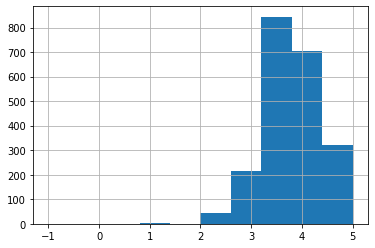

In [36]:
df.Rating.hist()
#pretty much normalized

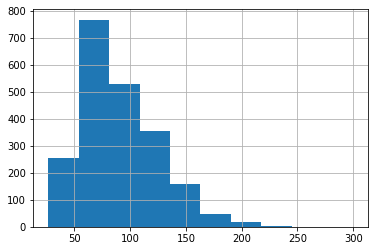

In [37]:
df.avg_salary.hist()
# it seems that the avg_salary data is skewed

In [38]:
df.corr()['avg_salary']

index              0.320292
Rating             0.132071
Founded           -0.043257
Competitors             NaN
per_hour          -0.041515
avg_salary         1.000000
FAANG                   NaN
desc_length        0.142071
python             0.347346
ML                 0.393835
big_data           0.273499
deep_learning      0.269124
cloud_computing    0.239684
graduate           0.154804
undergrad         -0.239897
Name: avg_salary, dtype: float64

In [39]:
df_cat = df[['Company Name','Location','Type of ownership', 'Industry', 'Sector','state','seniority',
               'title', 'python', 'ML', 'deep_learning','Size']]

graph is Company Name , and the total number is 15


E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


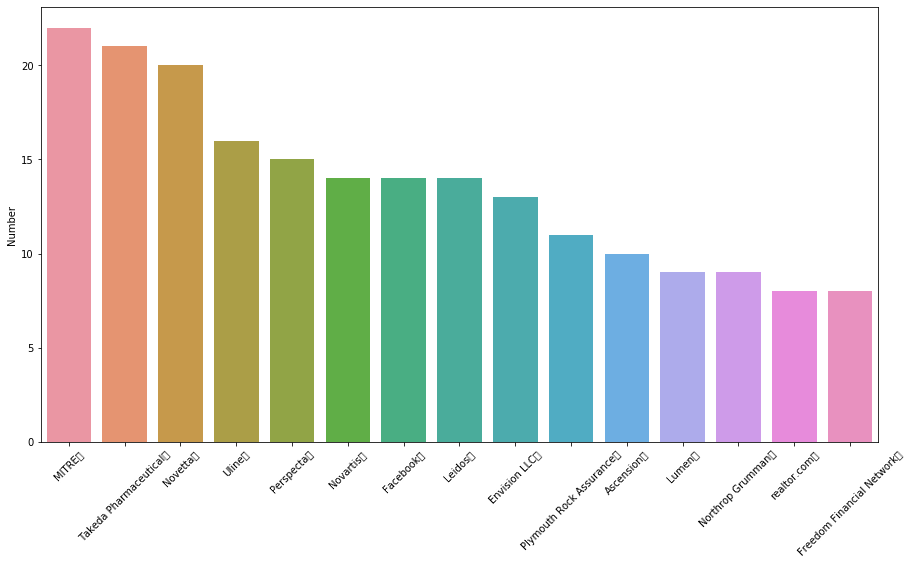

graph is Location , and the total number is 15


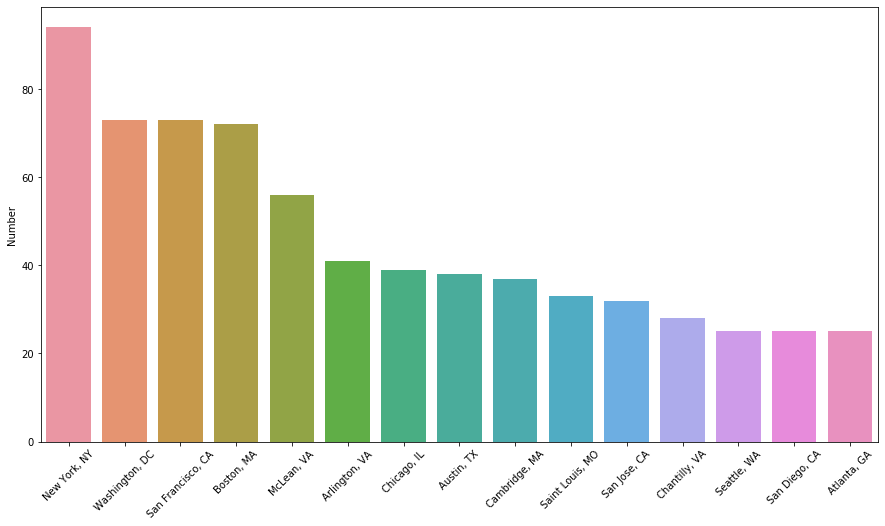

graph is Type of ownership , and the total number is 12


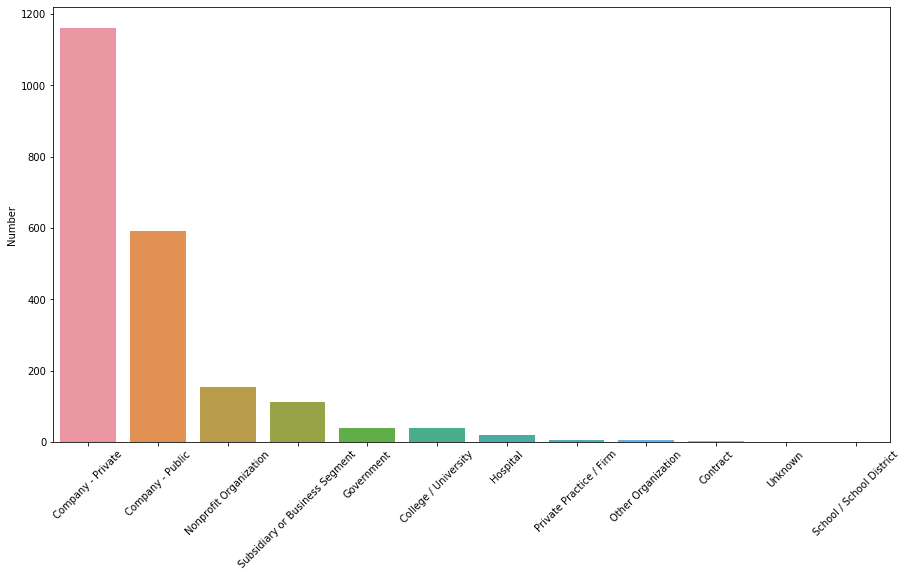

graph is Industry , and the total number is 15


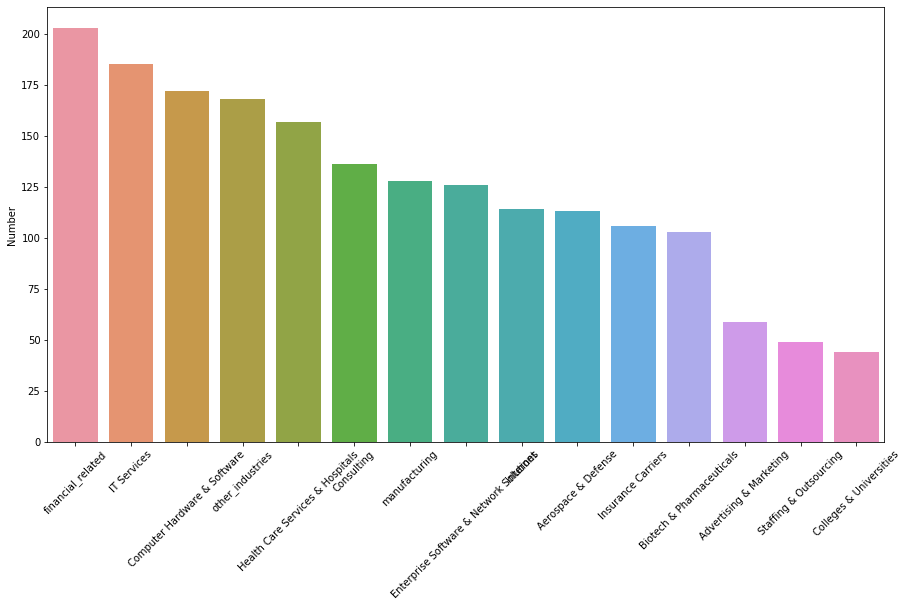

graph is Sector , and the total number is 15


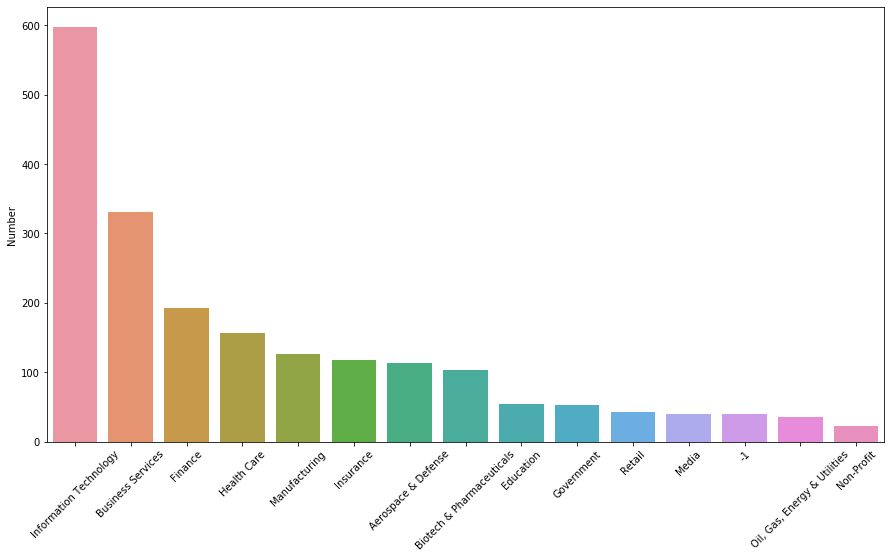

graph is state , and the total number is 15


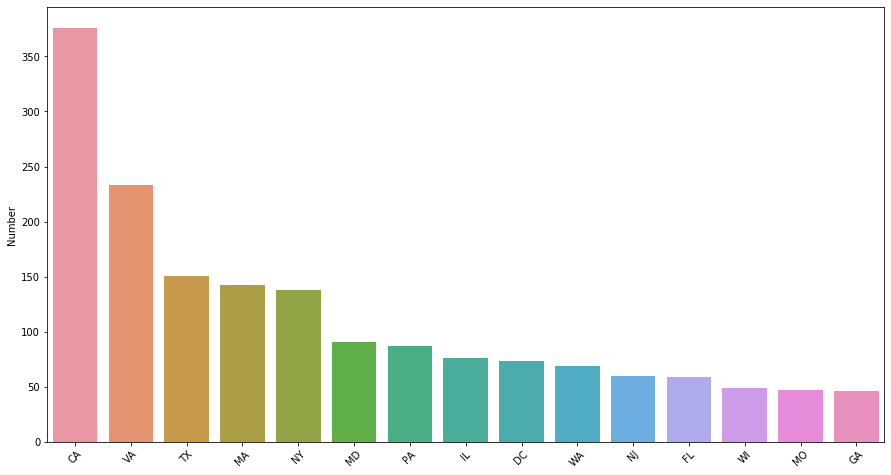

graph is seniority , and the total number is 2


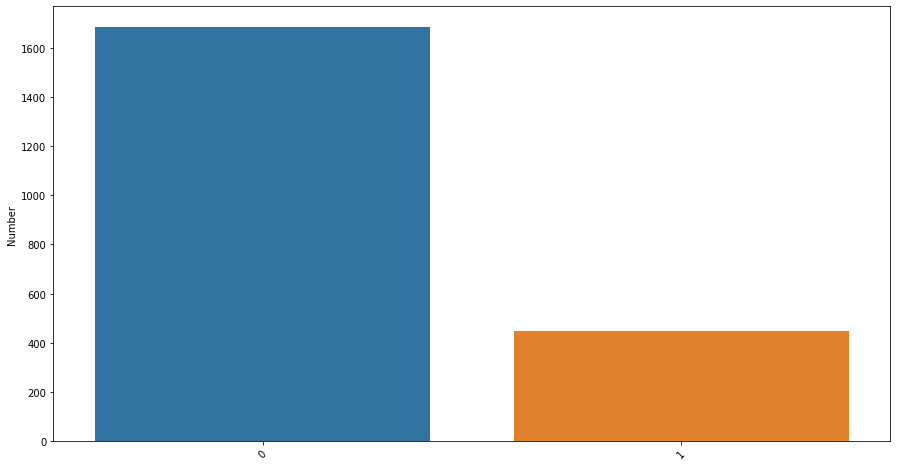

graph is title , and the total number is 5


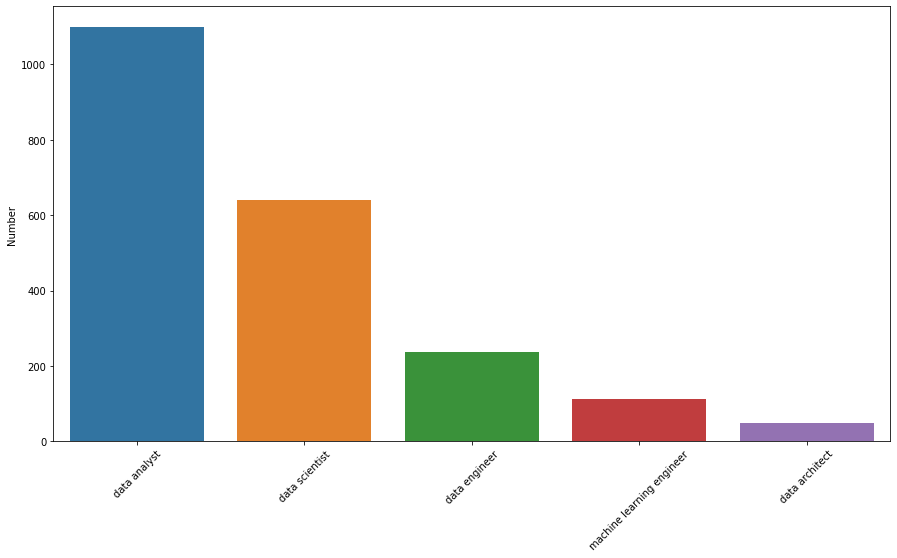

graph is python , and the total number is 2


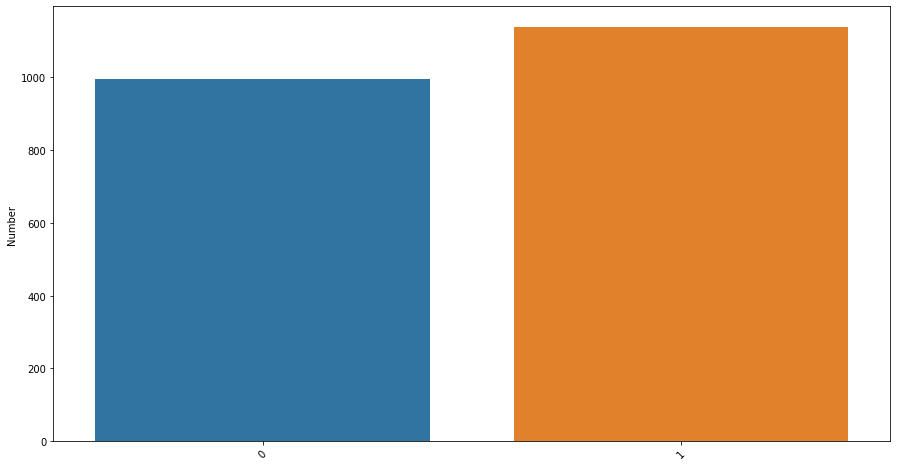

graph is ML , and the total number is 2


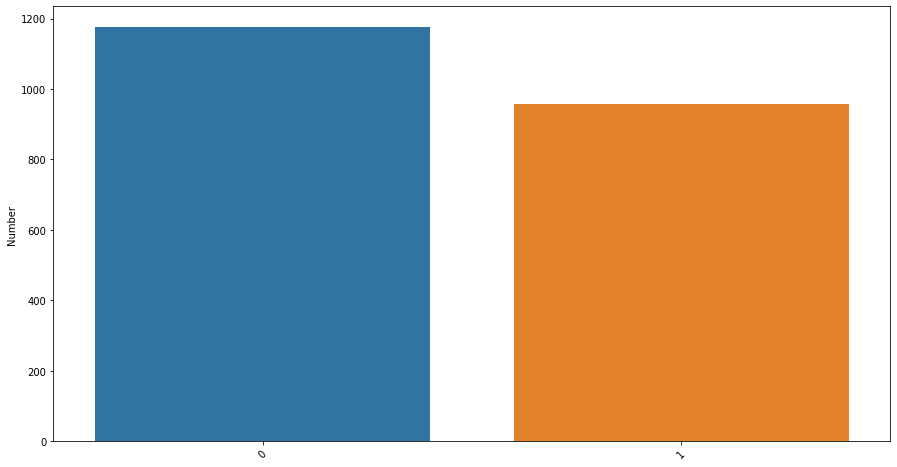

graph is deep_learning , and the total number is 2


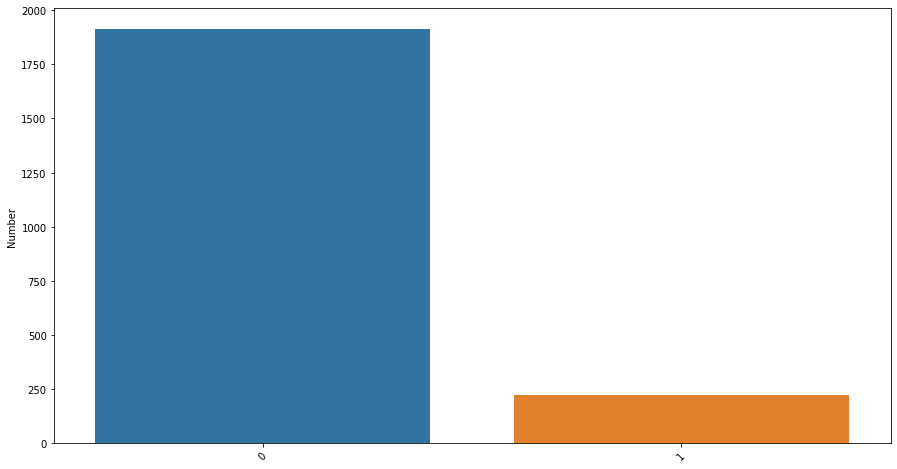

graph is Size , and the total number is 8


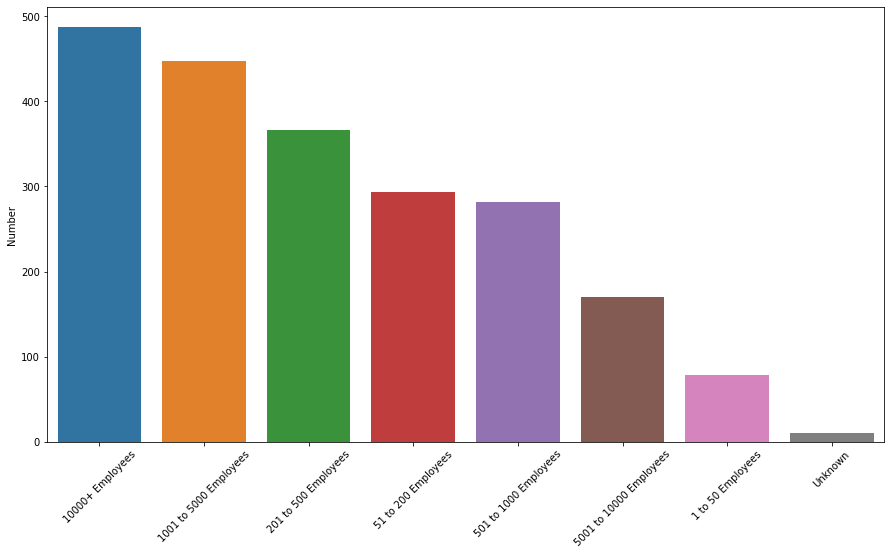

In [40]:
#lets draw some bar graphs for the categorical features
for i in df_cat.columns:
    plt.figure(figsize = (15,8))
    cat_num = df_cat[i].value_counts()[:15]
    print("graph is %s , and the total number is %d" %(i,len(cat_num)))
    ax = sns.barplot(x = cat_num.index , y = cat_num)
    ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
    ax.set(ylabel = 'Number')
    plt.show()
    

In [41]:
pd.pivot_table(df, index = ['title','seniority'] , values ='avg_salary')

avg_salary
title                     seniority            
data analyst              0           63.524590
                          1           88.826087
data architect            0          110.833333
                          1          116.111111
data engineer             0           98.740000
                          1          120.668605
data scientist            0          107.408163
                          1          132.183333
machine learning engineer 0          123.894444
                          1          169.666667

In [42]:
pd.pivot_table(df, index = ['title','graduate', 'seniority'] , values ='avg_salary', aggfunc=['count','mean'])

count        mean
                                             avg_salary  avg_salary
title                     graduate seniority                       
data analyst              0        0                685   62.798540
                                   1                116   87.241379
                          1        0                230   65.686957
                                   1                 68   91.529412
data architect            0        0                 28  107.732143
                                   1                  8  112.750000
                          1        0                 11  118.727273
                                   1                  1  143.000000
data engineer             0        0                117   97.354701
                                   1                 63  116.031746
                          1        0                 33  103.651515
                                   1                 23  133.369565
data scientist            0        0                219  110.002283
                                   1                 69  135.137681
                          1        0                271  105.311808
                                   1                 81  129.666667
machine learning engineer 0        0                 58  122.956897
                                   1                 12  173.083333
                          1        0                 32  125.593750
                                   1                  9  165.111111

In [43]:
pd.pivot_table(df, index = 'Industry' , values ='avg_salary').sort_values('avg_salary', ascending=False).iloc[1:6]

,avg_salary
Industry,
Biotech & Pharmaceuticals,113.859223
Internet,113.842105
Federal Agencies,104.659091
Computer Hardware & Software,102.906977
Enterprise Software & Network Solutions,99.630952


In [44]:
pd.pivot_table(df, index = 'Industry' , values ='avg_salary').sort_values('avg_salary')[0:5]

,avg_salary
Industry,
Social Assistance,58.115385
Colleges & Universities,61.295455
Architectural & Engineering Services,67.650000
Publishing,70.000000
Staffing & Outsourcing,72.102041


In [45]:
df = df[df.Size != 'Unknown']

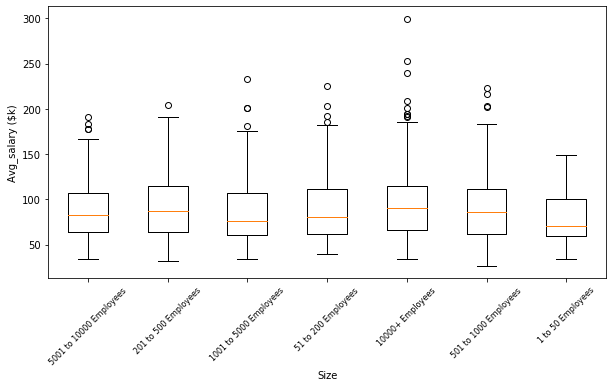

In [46]:
unique_size = df.Size.unique()
e1 = df.loc[df.Size == unique_size[0], 'avg_salary']
e2 = df.loc[df.Size == unique_size[1], 'avg_salary']
e3 = df.loc[df.Size == unique_size[2], 'avg_salary']
e4 = df.loc[df.Size == unique_size[3], 'avg_salary']
e5 = df.loc[df.Size == unique_size[4], 'avg_salary']
e6 = df.loc[df.Size == unique_size[5], 'avg_salary']
e7 = df.loc[df.Size == unique_size[6], 'avg_salary']
data = [e1, e2, e3, e4, e5, e6, e7]
fig3, ax = plt.subplots(figsize = (10,5))
ax.boxplot(data)
ax.set_xticklabels(unique_size,rotation=45, fontsize=8)
ax.set(xlabel = 'Size', ylabel = 'Avg_salary ($k)')
plt.show()

In [47]:
df_state = pd.pivot_table(df, index = 'state' , values ='avg_salary').sort_values('avg_salary',ascending =False)

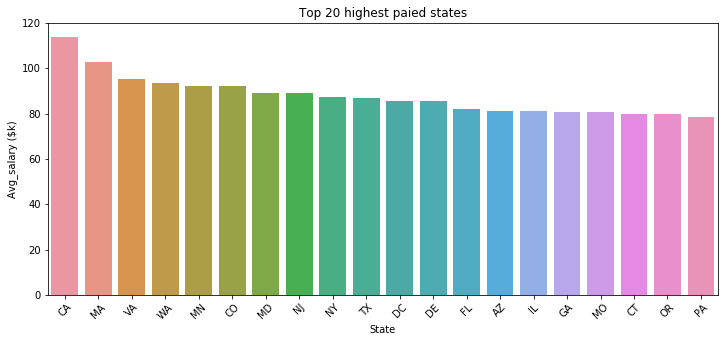

In [48]:
df_state = pd.pivot_table(df, index = 'state' , values ='avg_salary').sort_values('avg_salary',ascending =False)
fig2, ax = plt.subplots(figsize = (12,5))
highest_labels = np.array(df_state.index)[1:21]
highest_heights = df_state.avg_salary[1:21]
ax = sns.barplot(x = highest_labels , y = highest_heights)
ax.set_xticklabels(ax.get_xticklabels() , rotation = 45)
ax.set(xlabel = 'State', ylabel = 'Avg_salary ($k)')
ax.set_title("Top 20 highest paied states")
ax.set(ylim=(0, 120))
plt.show()


In [49]:
df = df.loc[df.state != 'Los Angeles']

In [51]:
# doing some text analysis on the job description
from wordcloud import WordCloud , STOPWORDS
from nltk.corpus import stopwords;
from nltk.tokenize import word_tokenize
#nltk.download('all')

In [52]:
s = df['Job Description'].str.split("[R|r]equired", expand=True)[3].fillna("1")+df['Job Description'].str.split("[R|r]equired", expand=True)[4].fillna("1")
s = s.replace("11",np.nan)

In [53]:
s1 = df['Job Description'].str.split("[R|r]equirements?", expand=True)[1]

In [54]:
df['job_requirement'] = df['Job Description'].str.split("[Q|q]ualifications?:?", expand=True)[1]+df['Job Description'].str.split("[Q|q]ualification", expand=True)[2]
df['job_requirement'] = df['job_requirement'].replace('11', np.nan)
df['job_requirement'].fillna(s, inplace=True)
df['job_requirement'].fillna(s1, inplace=True)

In [55]:
df['job_requirement'].isnull().sum()

724

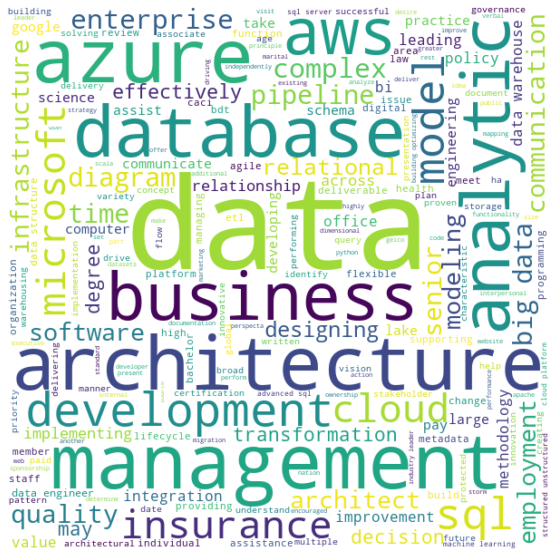

In [78]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
df_skill = df.dropna(axis = 0)
words = " ".join(df_skill.loc[df_skill.title == 'data architect', 'job_requirement'])
def pucntuation_remover(input_text):
    filtered = []
    input_text = input_text.lower()
    word_token = word_tokenize(input_text)
    lemmatized_tokens = [lemma.lemmatize(w.lower()) for w in word_token]
    stop_words = set(stopwords.words('english'))
    non_important = ['experience', 'equal', 'year', 'strong', 'etc', 'opportunity', 'knowledge', 'sex', 'using', ' new' 
                    'required', 'gender', 'veteran', 'employer', 'including', 'skills', 'environment', 'working', 'people'
                    'sexual', 'disability', 'preferred', 'familiarity', 'without', 'regard', 'race', 'color', 'required',
                    'tool', 'team', 'benefit', 'qualification', 'work', 'ability', 'tools', 'customer', 'technical', 'field', 'minimum',
                    'understanding', 'application', 'provide', 'related', 'origin', 'company', 'plus', 'identity', 'technology',
                     'orientation', 'solution', 'excellent', 'report', 'project', 'within', 'support', 'reporting', 'process', 'result', 
                     'demonstrated', 'skill', 'system', 'status',  'information', 'expertise', 'life', 'job', 'ensure', 'professional',
                    'education', 'analytical', 'analysis', 'well', 'product', 'requirement', 'responsibility', 'must', 'role', 'client', 'problem',
                     'use', 'people', 'develop', 'create', 'maintain', 'apply', 'new', 'program', 'candidate', 'based',
                     'applicant', 'employee', 'research', 'able', 'position', 'require', 'service', 'design', 'level', 'attention',
                    'need']
    for i in lemmatized_tokens:
        if (i not in stop_words) and (i not in non_important) and i.isalpha():
            filtered.append(i.lower())
    return filtered
text = pucntuation_remover(words)
wc = WordCloud(width = 600 , height = 600 , background_color = 'white' , stopwords = STOPWORDS, collocations=True)
wc.generate(" ".join(text))
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Lets see how many years of experience each job needs

In [57]:
df_exp = df['Job Description'].str.extractall(r'\(?(\d?\d)\+?\)? (?:Y|y)ear')
df_exp.rename(columns = {0:'exp_year'},inplace=True)
df_exp['exp_year'].fillna(0,inplace=True)
df_exp.reset_index('match',inplace=True)
df_exp['exp_year'] = df_exp['exp_year'].astype('int32')
df_exp.drop('match',axis=1,inplace=True)

In [58]:
# There are some wierd numbers in years of exp. Lets check anything greater than 10
print(df_exp[df_exp['exp_year']>10])

      exp_year
14          30
16          11
17          75
28          55
31          25
...        ...
2881        12
2888        15
2890        20
2926        12
2942        20

[188 rows x 1 columns]


In [59]:
#Lets remove any years of expereicne more than 14 
df_exp = df_exp[df_exp['exp_year']<15]

In [60]:
df_exp2 =  df_exp.groupby(df_exp.index)['exp_year'].mean()

In [61]:
df2 = pd.merge(df,df_exp2, left_index = True, right_index =True, how = 'left') 

In [62]:
df2['exp_year'].fillna(0,inplace=True)

## Lets Export the final data frame

In [63]:
# df = df.loc[df.avg_salary > 40]
df2.to_csv('eda_data_modified')

In [64]:
df.loc[0:5,'avg_salary']

0    51.5
1    52.0
2    61.5
3    72.0
4    47.5
5    62.5
Name: avg_salary, dtype: float64

([<matplotlib.patches.Wedge at 0x1f8c77e9948>,
 [Text(-0.049630026296223116, 1.0988798207674195, 'data analyst'),
  Text(-1.0857218094975047, -0.17665829270505332, 'data architect'),
  Text(-0.9191691454523322, -0.6042582908396289, 'data engineer'),
  Text(0.32626687413561045, -1.0504998461883648, 'data scientist'),
  Text(1.0851941867572785, -0.1798710010763521, 'machine learning engineer')],
 [Text(-0.027070923434303513, 0.5993889931458651, '51.4%'),
  Text(-0.5922118960895479, -0.09635906874821089, '2.3%'),
  Text(-0.5013649884285447, -0.3295954313670703, '11.1%'),
  Text(0.1779637495285148, -0.5729999161027444, '30.0%'),
  Text(0.5919241018676064, -0.09811145513255569, '5.2%')])

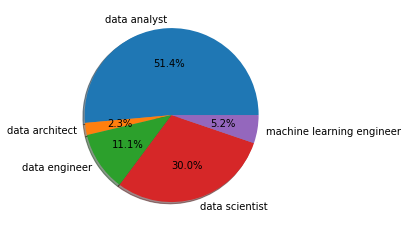

In [65]:
values = df.groupby('title')['title'].count().values
labels = df.groupby('title')['title'].count().index
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True)

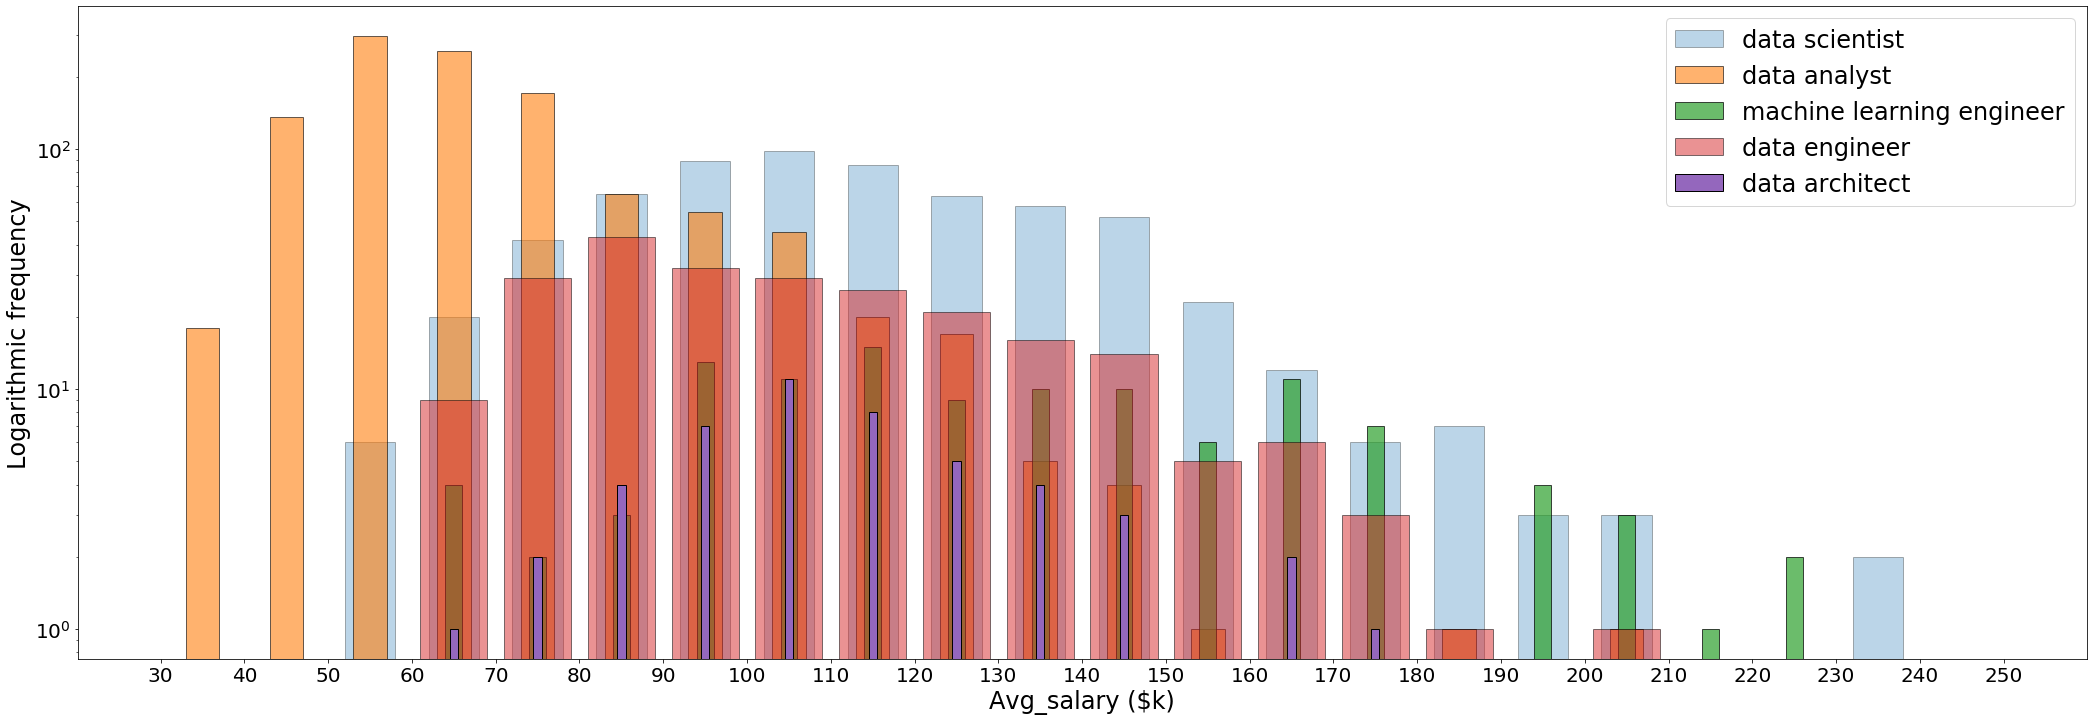

In [66]:
bins = range(30, 260, 10)
ds = df[df.title == 'data scientist']['avg_salary'].values
da = df[df.title == 'data analyst']['avg_salary'].values
ml = df[df.title == 'machine learning engineer']['avg_salary'].values
de = df[df.title == 'data engineer']['avg_salary'].values
dar = df[df.title == 'data architect']['avg_salary'].values
fig1, ax1 = plt.subplots(figsize = (36,12))
ax1.hist(ds, bins, alpha=0.3, edgecolor='black', label='data scientist', rwidth=0.6)
ax1.hist(da, bins, alpha=0.6, edgecolor='black', label='data analyst', rwidth=0.4)
ax1.hist(ml, bins, alpha=0.7, edgecolor='black', label='machine learning engineer', rwidth=0.2)
ax1.hist(de, bins, alpha=0.5, edgecolor='black', label='data engineer', rwidth=0.8)
ax1.hist(dar, bins, alpha=1, edgecolor='black', label='data architect', rwidth=0.1)
ax1.set_xticks(range(30,260,10))
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_yscale('log')
ax1.set_ylabel('Logarithmic frequency', fontsize=24)
ax1.set_xlabel('Avg_salary ($k)', fontsize=24)
plt.legend(loc='upper right', fontsize=24)

In [67]:
df.loc[4,'Job Description']

"Data Analyst - MCS Research & Development - INTEGRIS\r\n\r\nDon't miss out on this fantastic opportunity to take yournursing career in a new, exciting direction. INTEGRIS is look for a RN thatwould love to explore the Data field with in our Nazih Zuhdi Transplant Institute.Learn how to use your clinical experience to better understand data that isused to make business decisions, while working a M – F business schedule.\r\n\r\nJob Code: 1729\r\n\r\nPosition Summary:\r\n\r\nThis position is responsible for the design, implementation, maintenance, integrity and data quality of the Nazih Zuhdi Transplant Institute (NZTI) in support of strict reporting requirements. This includes ongoing analysis of health care information, obtained from a variety of sources, including patient care, financial, and demographic data. It involves development and preparation of information products for transplant leadership, physicians and staff, including the assembly of documentation required for submission 

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

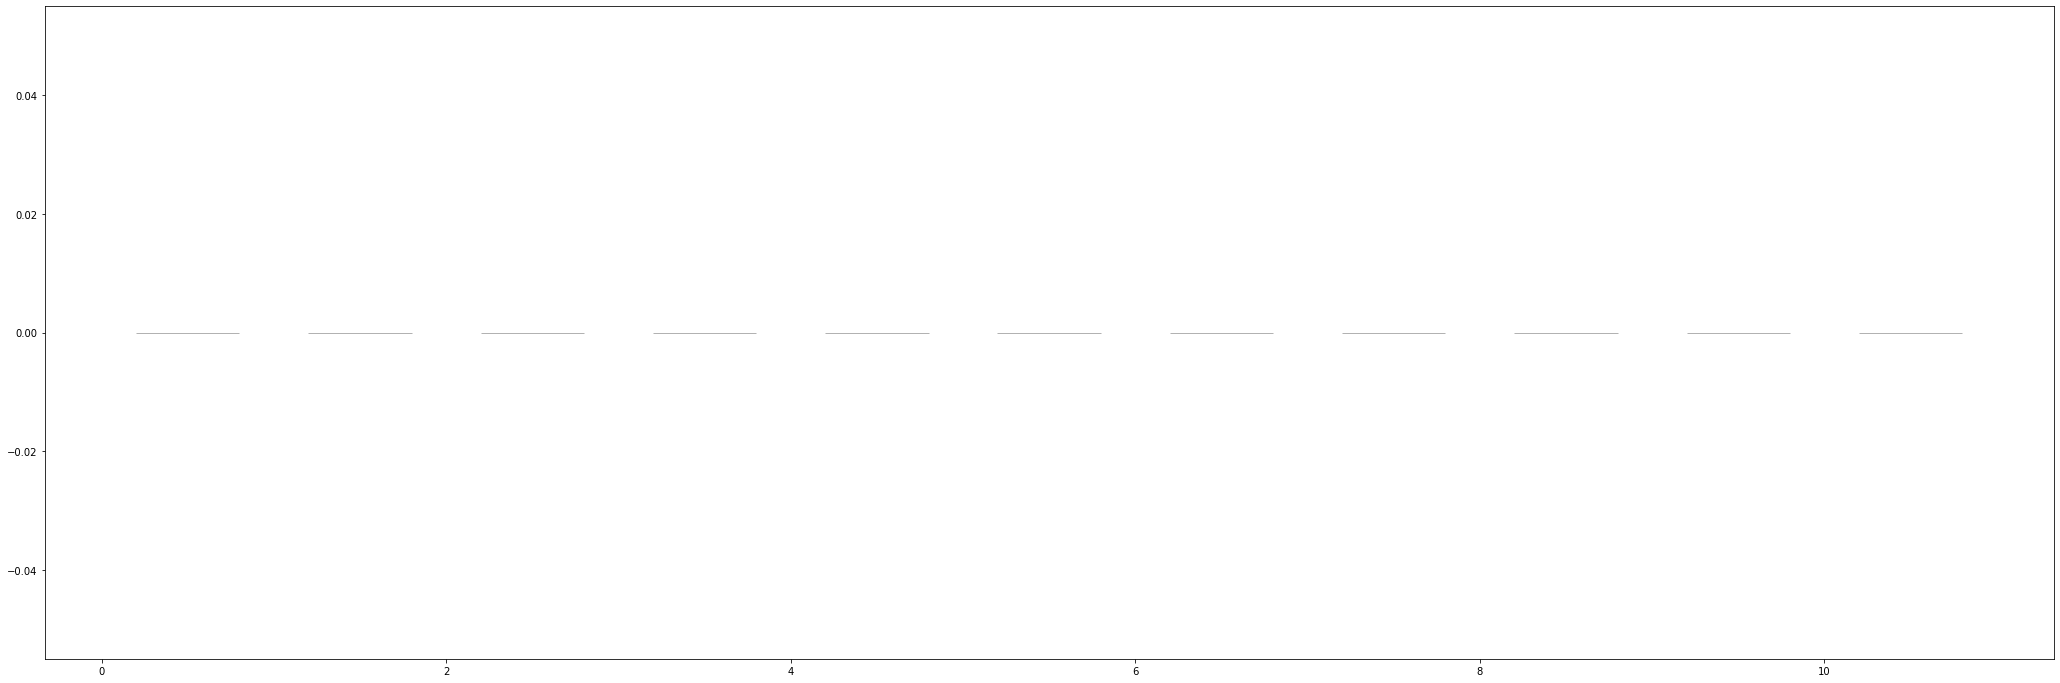

In [68]:
bins = range(0, 12)
ds = df[df.title == 'data scientist']['avg_salary'].values
da = df[df.title == 'data analyst']['avg_salary'].values
ml = df[df.title == 'machine learning engineer']['avg_salary'].values
de = df[df.title == 'data engineer']['avg_salary'].values
dar = df[df.title == 'data architect']['avg_salary'].values
fig1, ax1 = plt.subplots(figsize = (36,12))
ax1.hist(ds, bins, alpha=0.3, edgecolor='black', label='data scientist', rwidth=0.6)

In [69]:
df.loc[7, 'Job Description']

'Overview:\r\nCan you work in a relationship with other people where it requires ongoing flexibility?\r\nDo you have an upbeat, positive attitude?\r\nDo you take pride in knowing you are helping to make things happen?\r\n\r\nIf you can answer yes to these questions, Idaho Central Credit Union may have an opportunity ideally suited for you.\r\n\r\nAs a Marketing Data Analyst, your primary function is to interpret credit union data, analyze results and implement decisions based on the data. You will be responsible for turning data into information and insight that aids in campaign and business decisions. Also you will be responsible for performing a range of functions in support of market research, market assessment and campaign implementation.\r\n\r\nResponsibilities:\r\n\r\nAssist in managing technical aspects of key marketing systems (marketing automation, CRM, data warehouse) used to generate, distribute, and report.\r\nEstablish and maintain scalable processes that ensure best pract